Download Packages and Install libraries

In [ ]:
!pip install -q opencv-python
!pip install -q --upgrade tensorflow
!pip install -q --upgrade tensorflow transformers
from PIL import Image
import requests

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("image-classification", model="anirudhmu/swin-tiny-patch4-window7-224-finetuned-soccer-binary2")

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/110M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

In [ ]:
# Convert video to mp4
!ffmpeg -i 1_224p.mkv -c copy output1.mp4.        # 1st Half video
!ffmpeg -i 2_224p.mkv -c copy output2.mp4         # 2nd Half video

In [ ]:
# Function to show image

from PIL import Image as PILImage
from IPython.display import display, Image as IPythonImage
import cv2
import numpy as np
import io

def show_image(frame):
    # Convert the image to RGB (OpenCV uses BGR)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_img = PILImage.fromarray(frame_rgb)

    # Convert to JPEG Buffer
    buffer = io.BytesIO()
    pil_img.save(buffer, format='JPEG')

    # Display image
    display(IPythonImage(data=buffer.getvalue()))

## Functions for 2 halfs of the game
 1. 1_224p
 2. 2_224p

In [ ]:
import cv2
from PIL import Image


# Function to classify and process video frames
def classify_and_process_video1(video_path, fps):

    # Initialize video capture and get video properties
    cap = cv2.VideoCapture(video_path)

    # Access and store frame properties.
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_to_skip = int(1.5* fps)

    # Initialize video writers for different types of clips
    closeup_live_writer = cv2.VideoWriter('closeup_live1.mp4', cv2.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))
    overview_live_writer = cv2.VideoWriter('overview_live1.mp4', cv2.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))

    # Intialize flag to toggle between live and replay mode
    # Initialize cooldown
    in_highlight = False
    highlight_cooldown = 0
    highlight_counter = 0
    highlights_writer = None

    # Set initial frame number to 0
    frame_num = 0

    # Read in frame
    while frame_num < total_frames:
        if frame_num % 1000 == 0:
            print("Current Frame:", frame_num)

        success, frame = cap.read()
        if not success:
            break

        # Get inference from model use pipe
        pil_image = Image.fromarray(frame)
        results = pipe(pil_image)
        highest_score_result = max(results, key=lambda result: result["score"])
        highest_score_label = highest_score_result["label"]
        highest_score = highest_score_result["score"]

        # Toggle in_highlight based on high confidence logo detection and cooldown
        if highest_score_label == 'logo' and highest_score >= 0.98:
            if highlight_cooldown == 0:
                in_highlight = not in_highlight
                print(f"Toggled state at frame {frame_num}, confidence: {highest_score}")
                highlight_cooldown = frames_to_skip  # Reset cooldown

                if in_highlight:
                    highlight_counter += 1
                    highlight_filename = f'highlight1_{highlight_counter}.mp4'
                    highlights_writer = cv2.VideoWriter(highlight_filename, cv2.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))
                else:
                    if highlights_writer is not None:
                        highlights_writer.release()

                show_image(frame)
                print("Flag:", in_highlight)

        # Decrement cooldown
        if highlight_cooldown > 0:
            highlight_cooldown -= 1

        # Write frames based on current mode
        if not in_highlight:
            if highest_score_label == 'Closeup':
                closeup_live_writer.write(frame)
            elif highest_score_label == 'Overview':
                overview_live_writer.write(frame)
        else:
            if highlights_writer is not None:
                highlights_writer.write(frame)

        frame_num += 1

    # Release all resources
    cap.release()
    closeup_live_writer.release()
    overview_live_writer.release()
    if highlights_writer is not None:
        highlights_writer.release()


In [ ]:
import cv2
from PIL import Image


# Function to classify and process video frames
def classify_and_process_video2(video_path, fps):
    # Initialize video capture and get video properties
    cap = cv2.VideoCapture(video_path)

    # Access and store frame properties.
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_to_skip = int(1.5 * fps)

    # Initialize video writers for different types of clips
    closeup_live_writer = cv2.VideoWriter('closeup_live2.mp4', cv2.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))
    overview_live_writer = cv2.VideoWriter('overview_live2.mp4', cv2.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))

    # Intialize flag to toggle between live and replay mode
    # Initialize cooldown
    in_highlight = False
    highlight_cooldown = 0
    highlight_counter = 0
    highlights_writer = None

    # Set initial frame number to 0
    frame_num = 0

    # Read in frame
    while frame_num < total_frames:
        if frame_num % 1000 == 0:
            print("Current Frame:", frame_num)

        success, frame = cap.read()
        if not success:
            break

        # Get inference from model use pipe
        pil_image = Image.fromarray(frame)
        results = pipe(pil_image)
        highest_score_result = max(results, key=lambda result: result["score"])
        highest_score_label = highest_score_result["label"]
        highest_score = highest_score_result["score"]

        # Toggle in_highlight based on high confidence logo detection and cooldown
        if highest_score_label == 'logo' and highest_score >= 0.98:
            if highlight_cooldown == 0:
                in_highlight = not in_highlight
                print(f"Toggled state at frame {frame_num}, confidence: {highest_score}")
                highlight_cooldown = frames_to_skip  # Reset cooldown

                if in_highlight:
                    highlight_counter += 1
                    highlight_filename = f'highlight2_{highlight_counter}.mp4'
                    highlights_writer = cv2.VideoWriter(highlight_filename, cv2.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))
                else:
                    if highlights_writer is not None:
                        highlights_writer.release()

                show_image(frame)
                print("Flag:", in_highlight)

        # Decrement cooldown
        if highlight_cooldown > 0:
            highlight_cooldown -= 1

        # Write frames based on current mode
        if not in_highlight:
            if highest_score_label == 'Closeup':
                closeup_live_writer.write(frame)
            elif highest_score_label == 'Overview':
                overview_live_writer.write(frame)
        else:
            if highlights_writer is not None:
                highlights_writer.write(frame)

        frame_num += 1

    # Release all resources
    cap.release()
    closeup_live_writer.release()
    overview_live_writer.release()
    if highlights_writer is not None:
        highlights_writer.release()


Current Frame: 0
Current Frame: 1000
Current Frame: 2000
Current Frame: 3000
Current Frame: 4000
Current Frame: 5000
Current Frame: 6000
Current Frame: 7000
Toggled state at frame 7490, confidence: 0.9871301054954529


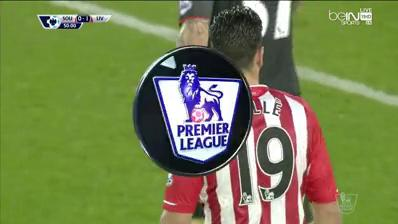

Flag: True
Toggled state at frame 7754, confidence: 0.98467618227005


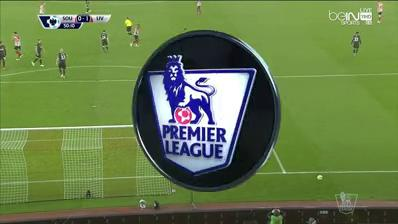

Flag: False
Current Frame: 8000
Current Frame: 9000
Current Frame: 10000
Current Frame: 11000
Toggled state at frame 11202, confidence: 0.9981182813644409


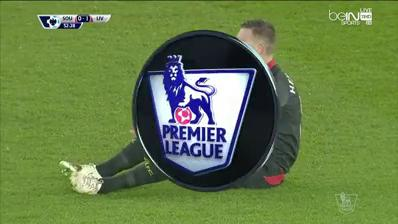

Flag: True
Toggled state at frame 11385, confidence: 0.992373526096344


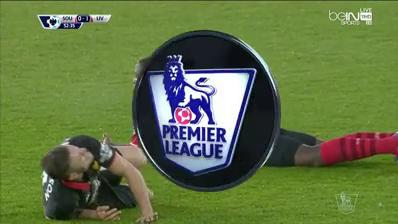

Flag: False
Current Frame: 12000
Current Frame: 13000
Current Frame: 14000
Toggled state at frame 14732, confidence: 0.995274007320404


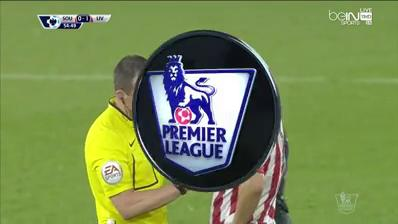

Flag: True
Toggled state at frame 14963, confidence: 0.9807270765304565


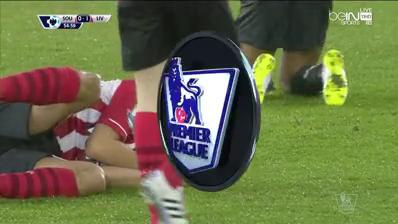

Flag: False
Current Frame: 15000
Current Frame: 16000
Current Frame: 17000
Current Frame: 18000
Current Frame: 19000
Current Frame: 20000
Current Frame: 21000
Current Frame: 22000
Current Frame: 23000
Current Frame: 24000
Current Frame: 25000
Current Frame: 26000
Toggled state at frame 26953, confidence: 0.9950195550918579


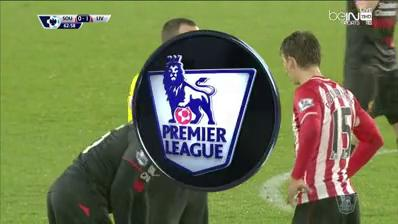

Flag: True
Current Frame: 27000
Toggled state at frame 27156, confidence: 0.9908696413040161


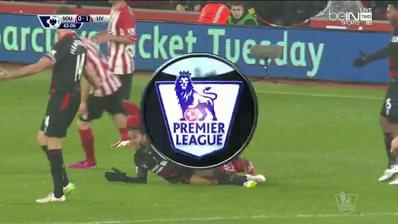

Flag: False
Current Frame: 28000
Current Frame: 29000
Current Frame: 30000
Current Frame: 31000
Current Frame: 32000
Current Frame: 33000
Current Frame: 34000
Toggled state at frame 34794, confidence: 0.9865224957466125


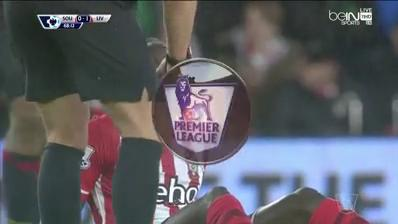

Flag: True
Toggled state at frame 34970, confidence: 0.9910972118377686


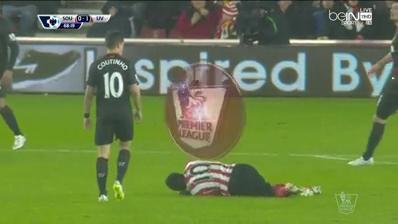

Flag: False
Current Frame: 35000
Current Frame: 36000
Current Frame: 37000
Current Frame: 38000
Toggled state at frame 38813, confidence: 0.9838603734970093


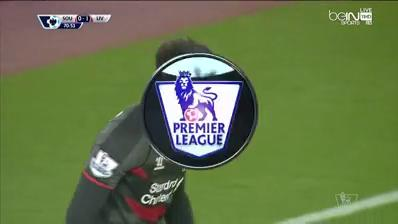

Flag: True
Toggled state at frame 38989, confidence: 0.980381965637207


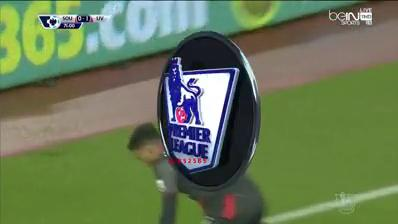

Flag: False
Current Frame: 39000
Current Frame: 40000
Current Frame: 41000
Current Frame: 42000
Toggled state at frame 42263, confidence: 0.9904070496559143


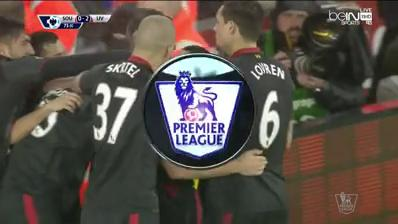

Flag: True
Current Frame: 43000
Toggled state at frame 43249, confidence: 0.986166775226593


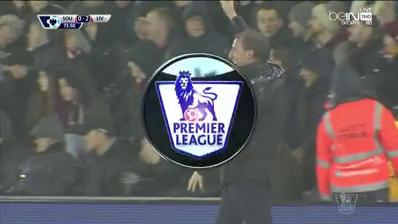

Flag: False
Current Frame: 44000
Current Frame: 45000
Current Frame: 46000
Current Frame: 47000
Current Frame: 48000
Toggled state at frame 48078, confidence: 0.9949931502342224


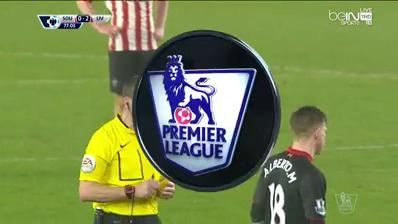

Flag: True
Toggled state at frame 48269, confidence: 0.982648491859436


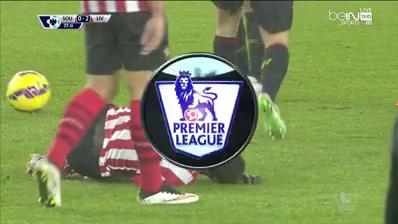

Flag: False
Current Frame: 49000
Toggled state at frame 49621, confidence: 0.9955930113792419


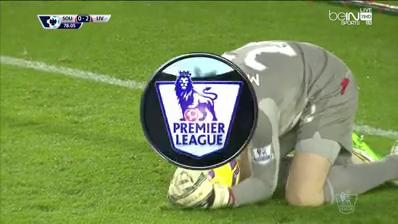

Flag: True
Toggled state at frame 49923, confidence: 0.9920309782028198


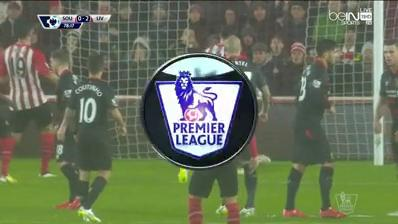

Flag: False
Current Frame: 50000
Current Frame: 51000
Current Frame: 52000
Current Frame: 53000
Current Frame: 54000
Current Frame: 55000
Current Frame: 56000
Toggled state at frame 56497, confidence: 0.9980282187461853


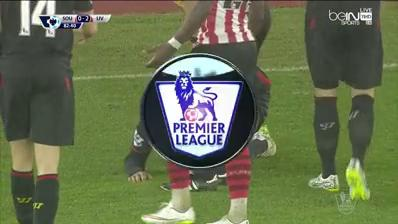

Flag: True
Toggled state at frame 56930, confidence: 0.9927901029586792


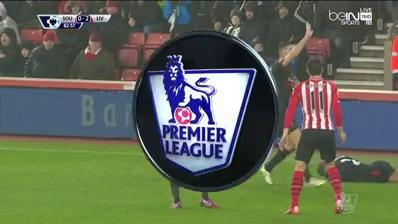

Flag: False
Current Frame: 57000
Current Frame: 58000
Toggled state at frame 58359, confidence: 0.9879436492919922


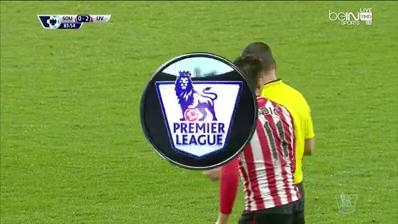

Flag: True
Toggled state at frame 58625, confidence: 0.9896013140678406


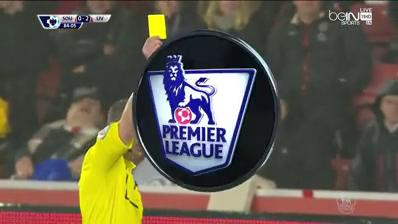

Flag: False
Current Frame: 59000
Current Frame: 60000
Current Frame: 61000
Current Frame: 62000
Current Frame: 63000
Current Frame: 64000
Current Frame: 65000
Current Frame: 66000
Toggled state at frame 66933, confidence: 0.9901455044746399


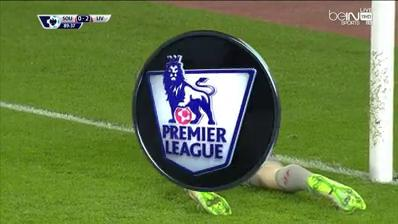

Flag: True
Current Frame: 67000
Toggled state at frame 67276, confidence: 0.9935835003852844


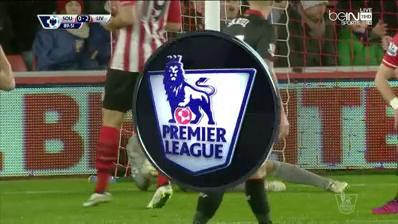

Flag: False
Current Frame: 68000
Toggled state at frame 68177, confidence: 0.9965032339096069


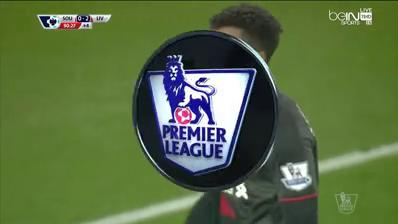

Flag: True
Toggled state at frame 68422, confidence: 0.9904187321662903


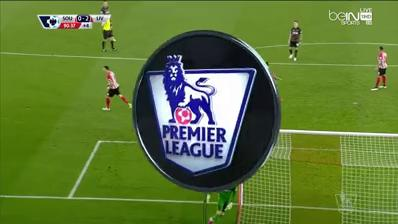

Flag: False
Current Frame: 69000
Current Frame: 70000


In [ ]:
# Example usage
video_path1 = 'output1.mp4'
video_path2 = 'output2.mp4'
fps = 25
classify_and_process_video1(video_path1, fps)
classify_and_process_video2(video_path2, fps)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("image-classification", model="anirudhmu/swin-tiny-patch4-window7-224-finetuned-soccer-binary")